#Importe libs

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Tempo de convergencias

In [133]:
# Tempos de convergência no formato HH:MM:SS

#CDC
tempoLW1 = [
    "18:28:52",
    "18:28:55",
    "18:28:59",
    "18:29:02",
    "18:29:05",
    "18:29:08",
    "18:29:12",
    "18:29:15",
    "18:29:18",
    "18:29:22",
    "18:29:25",
    "18:29:28",
    "18:29:31",
    "18:29:35",
    "18:29:38",
    "18:29:41",
    "18:29:45",
    "18:29:48",
    "18:29:51",
    "18:29:55"
]

#Reitoria
tempoLW2 = [
    "18:28:52",
    "18:28:55",
    "18:28:59",
    "18:29:02",
    "18:29:05",
    "18:29:08",
    "18:29:12",
    "18:29:15",
    "18:29:18",
    "18:29:22",
    "18:29:25",
    "18:29:28",
    "18:29:31",
    "18:29:35",
    "18:29:38",
    "18:29:41",
    "18:29:45",
    "18:29:48",
    "18:29:51",
    "18:29:55"
]

#CDC
tempoBB1 = ['19:04:46', '19:04:47', '19:04:51', '19:04:55', '19:05:00', '19:05:04', '19:05:08', '19:05:12', '19:05:16', '19:05:25', '19:05:28', '19:05:31', '19:05:35', '19:05:38', '19:05:41', '19:05:44', '19:05:48', '19:05:56', '19:06:00', '19:06:03', '19:06:07', '19:06:10', '19:06:14', '19:06:17', '19:06:21', '19:06:29', '19:06:33', '19:06:36', '19:06:40', '19:06:44', '19:06:47', '19:06:51', '19:06:54', '19:07:03', '19:07:06', '19:07:10', '19:07:13', '19:07:17', '19:07:21', '19:07:24', '19:07:28', '19:07:35']


#Reitoria
tempoBB2 = ['14:55:05', '14:55:09', '14:55:13', '14:55:17', '14:55:22', '14:55:26', '14:55:30', '14:55:34', '14:55:43', '14:55:46', '14:55:49', '14:55:52', '14:55:56', '14:55:59', '14:56:02', '14:56:06', '14:56:14', '14:56:17', '14:56:21', '14:56:24', '14:56:28', '14:56:32', '14:56:35', '14:56:39', '14:56:47', '14:56:51', '14:56:54', '14:56:58', '14:57:01', '14:57:05', '14:57:09', '14:57:12', '14:57:21', '14:57:24', '14:57:28', '14:57:31', '14:57:35', '14:57:38', '14:57:42', '14:57:46', '14:57:53']




#Processamento dos dados

In [134]:
pacotesBB1 = list(range(1,len(tempoBB1)+1))

pacotesBB2 = list(range(1,len(tempoBB2)+1))

pacotesLW1 = list(range(1,len(tempoLW1)+1))

pacotesLW2 = list(range(1,len(tempoLW2)+1))

def convert_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Converte todos os tempos para segundos

tempos_em_segundosBB1 = [convert_to_seconds(tempo) for tempo in tempoBB1]

tempos_em_segundosBB2 = [convert_to_seconds(tempo) for tempo in tempoBB2]

tempos_em_segundosLW1 = [convert_to_seconds(tempo) for tempo in tempoLW1]

tempos_em_segundosLW2 = [convert_to_seconds(tempo) for tempo in tempoLW2]

# Converte todos os tempos para minutos
tempos_em_minutos_BB1 = [tempo / 60 for tempo in tempos_em_segundosBB1]

tempos_em_minutos_BB2 = [tempo / 60 for tempo in tempos_em_segundosBB2]

tempos_em_minutos_LW1 = [tempo / 60 for tempo in tempos_em_segundosLW1]

tempos_em_minutos_LW2 = [tempo / 60 for tempo in tempos_em_segundosLW2]


min1=   min(tempos_em_minutos_BB1)
min2 =  min(tempos_em_minutos_BB2)
min3 =  min(tempos_em_minutos_LW1)
min4 =  min(tempos_em_minutos_LW2)


max_value = max(
    max(tempos_em_minutos_BB1),
    max(tempos_em_minutos_BB2),
    max(tempos_em_minutos_LW1),
    max(tempos_em_minutos_LW2)
)

# Normalize os valores subtraindo o menor valor
tempos_normalizados_BB1 = [tempo - min1 for tempo in tempos_em_minutos_BB1]
tempos_normalizados_BB2 = [tempo - min2 for tempo in tempos_em_minutos_BB2]
tempos_normalizados_LW1 = [tempo - min3 for tempo in tempos_em_minutos_LW1]
tempos_normalizados_LW2 = [tempo - min4 for tempo in tempos_em_minutos_LW2]

#Gráficos

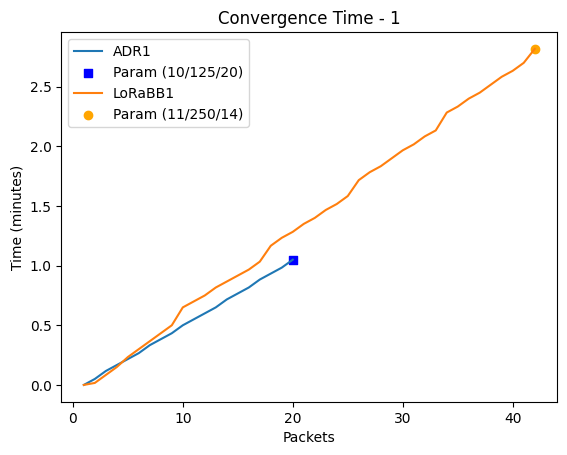

<Figure size 3600x2400 with 0 Axes>

In [135]:
#CDC

plt.plot(pacotesLW1, tempos_normalizados_LW1, label='ADR1')

plt.scatter([pacotesLW1[-1]], [tempos_normalizados_LW1[-1]], color='blue', marker='s', label='Param (10/125/20)')



# Criar o gráfico de linha para BB1
plt.plot(pacotesBB1, tempos_normalizados_BB1, label='LoRaBB1')

plt.scatter([pacotesBB1[-1]], [tempos_normalizados_BB1[-1]], color='orange', marker='o', label='Param (11/250/14)')


# Adicionar legendas ao gráfico
plt.legend()

# Adicionar rótulos aos eixos
plt.xlabel('Packets')
plt.ylabel('Time (minutes)')

# Adicionar título ao gráfico
plt.title('Convergence Time - 1')
plt.figure(figsize=(12,8), dpi=300)

# Mostrar o gráfico
plt.show()


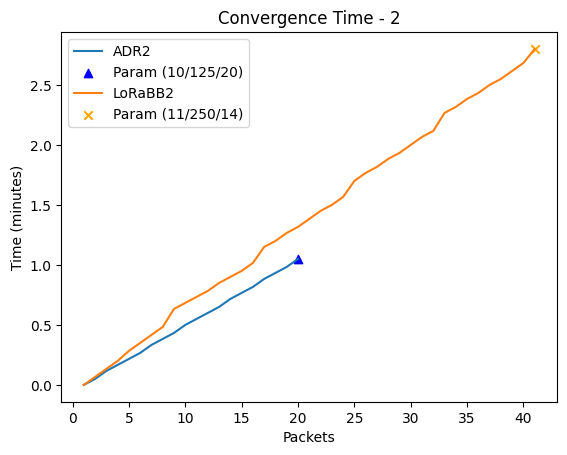

<Figure size 3600x2400 with 0 Axes>

In [136]:
#Reitoria

# Criar o gráfico de linha para LoRaWAN2
plt.plot(pacotesLW2, tempos_normalizados_LW2, label='ADR2')



plt.scatter([pacotesLW2[-1]], [tempos_normalizados_LW2[-1]], color='blue', marker='^', label='Param (10/125/20)')

# Criar o gráfico de linha para BB2
plt.plot(pacotesBB2, tempos_normalizados_BB2, label='LoRaBB2')

plt.scatter([pacotesBB2[-1]], [tempos_normalizados_BB2[-1]], color='orange', marker='x', label='Param (11/250/14)')


# Adicionar legendas ao gráfico
plt.legend()

# Adicionar rótulos aos eixos
plt.xlabel('Packets')
plt.ylabel('Time (minutes)')

# Adicionar título ao gráfico
plt.title('Convergence Time - 2')
plt.figure(figsize=(12,8), dpi=300)

# Mostrar o gráfico
plt.show()

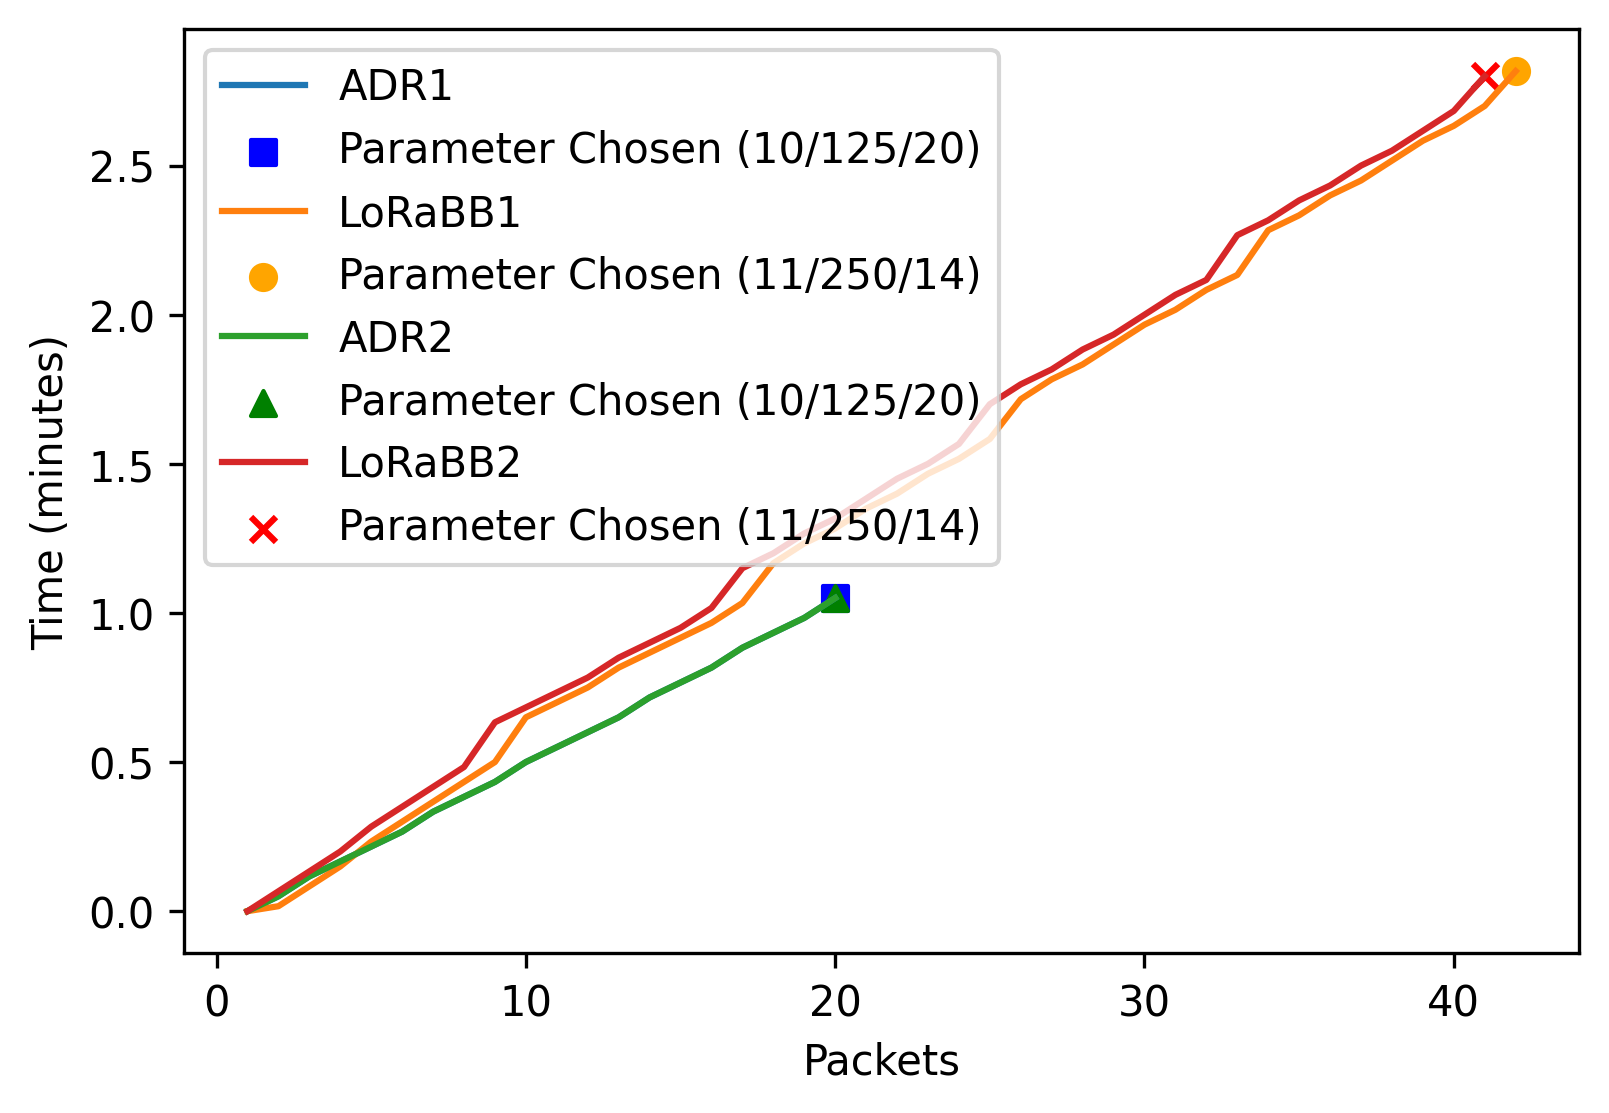

In [137]:
plt.figure(figsize=(6,4), dpi=300)

#Reitoria
plt.plot(pacotesLW1, tempos_normalizados_LW1, label='ADR1')

plt.scatter([pacotesLW1[-1]], [tempos_normalizados_LW1[-1]], color='blue', marker='s', label='Parameter Chosen (10/125/20)')



# Criar o gráfico de linha para BB1
plt.plot(pacotesBB1, tempos_normalizados_BB1, label='LoRaBB1')

plt.scatter([pacotesBB1[-1]], [tempos_normalizados_BB1[-1]], color='orange', marker='o', label='Parameter Chosen (11/250/14)')

# Criar o gráfico de linha para LoRaWAN2
plt.plot(pacotesLW2, tempos_normalizados_LW2, label='ADR2')

plt.scatter([pacotesLW2[-1]], [tempos_normalizados_LW2[-1]], color='green', marker='^', label='Parameter Chosen (10/125/20)')

# Criar o gráfico de linha para BB2
plt.plot(pacotesBB2, tempos_normalizados_BB2, label='LoRaBB2')

plt.scatter([pacotesBB2[-1]], [tempos_normalizados_BB2[-1]], color='red', marker='x', label='Parameter Chosen (11/250/14)')


# Adicionar legendas ao gráfico
plt.legend()

# Adicionar rótulos aos eixos
plt.xlabel('Packets')
plt.ylabel('Time (minutes)')

# Adicionar título ao gráfico

# Mostrar o gráfico
plt.show()

#Results Caracterization

In [138]:
#Perda CDC
ADR1 = [
    "18:28:52",
    "18:28:55",
    "18:28:59",
    "18:29:02",
    "18:29:05",
    "18:29:08",
    "18:29:12",
    "18:29:15",
    "18:29:18",
    "18:29:22",
    "18:29:25",
    "18:29:28",
    "18:29:31",
    "18:29:35",
    "18:29:38",
    "18:29:41",
    "18:29:45",
    "18:29:48",
    "18:29:51",
    "18:29:55"
]

#Perda Reitoria
ADR2 = [
    "15:20:46",
    "15:20:50",
    "15:20:53",
    "15:20:56",
    "15:21:00",
    "15:21:03",
    "15:21:06",
    "15:21:09",
    "15:21:13",
    "15:21:16",
    "15:21:19",
    "15:21:26",
    "15:21:29",
    "15:21:36",
    "15:21:39",
    "15:21:49"
]


BB1 = [
    "19:07:37",
    "19:07:41",
    "19:07:45",
    "19:07:49",
    "19:07:53",
    "19:07:57",
    "19:08:01",
    "19:08:05"
]

BB2 = [
    "14:57:54",
    "14:57:58",
    "14:58:03",
    "14:58:07",
    "14:58:11",
    "14:58:15",
    "14:58:19",
    "14:58:23"
]

ADR = [20,16]
BB = [8,8]

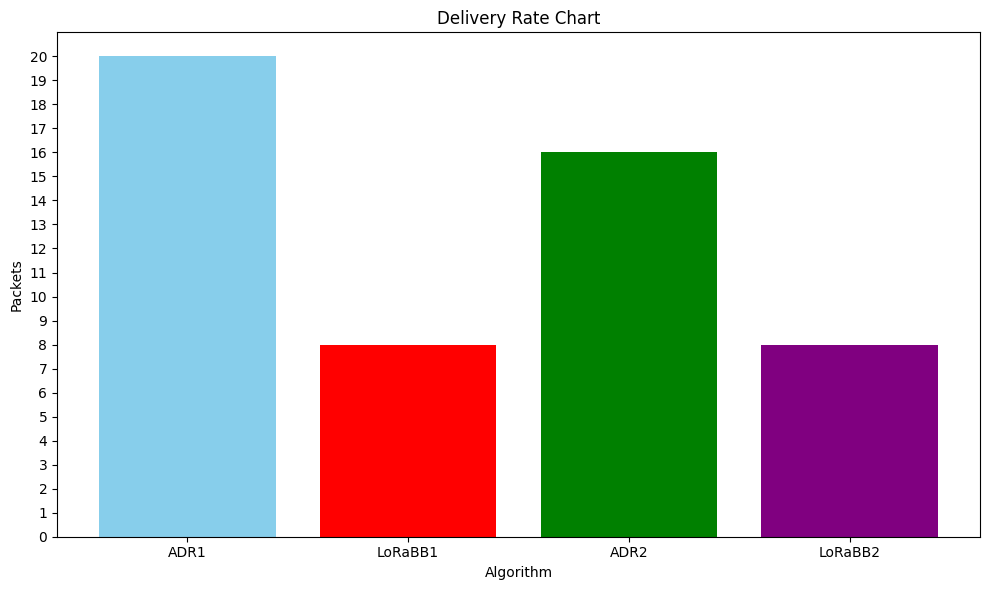

In [139]:
plt.figure(figsize=(10, 6))
plt.bar("ADR1",len(ADR1), color='skyblue')
plt.bar("LoRaBB1",len(BB1), color='red')
plt.bar("ADR2",len(ADR2), color='green')
plt.bar("LoRaBB2",len(BB2), color='purple')
plt.xlabel('Algorithm')
plt.ylabel('Packets')
plt.title('Delivery Rate Chart')
plt.yticks(range(0, max(len(ADR1), len(BB1), len(ADR2), len(BB2)) + 1, 1))

plt.tight_layout()
plt.show()

[20, 16]
[8, 8]


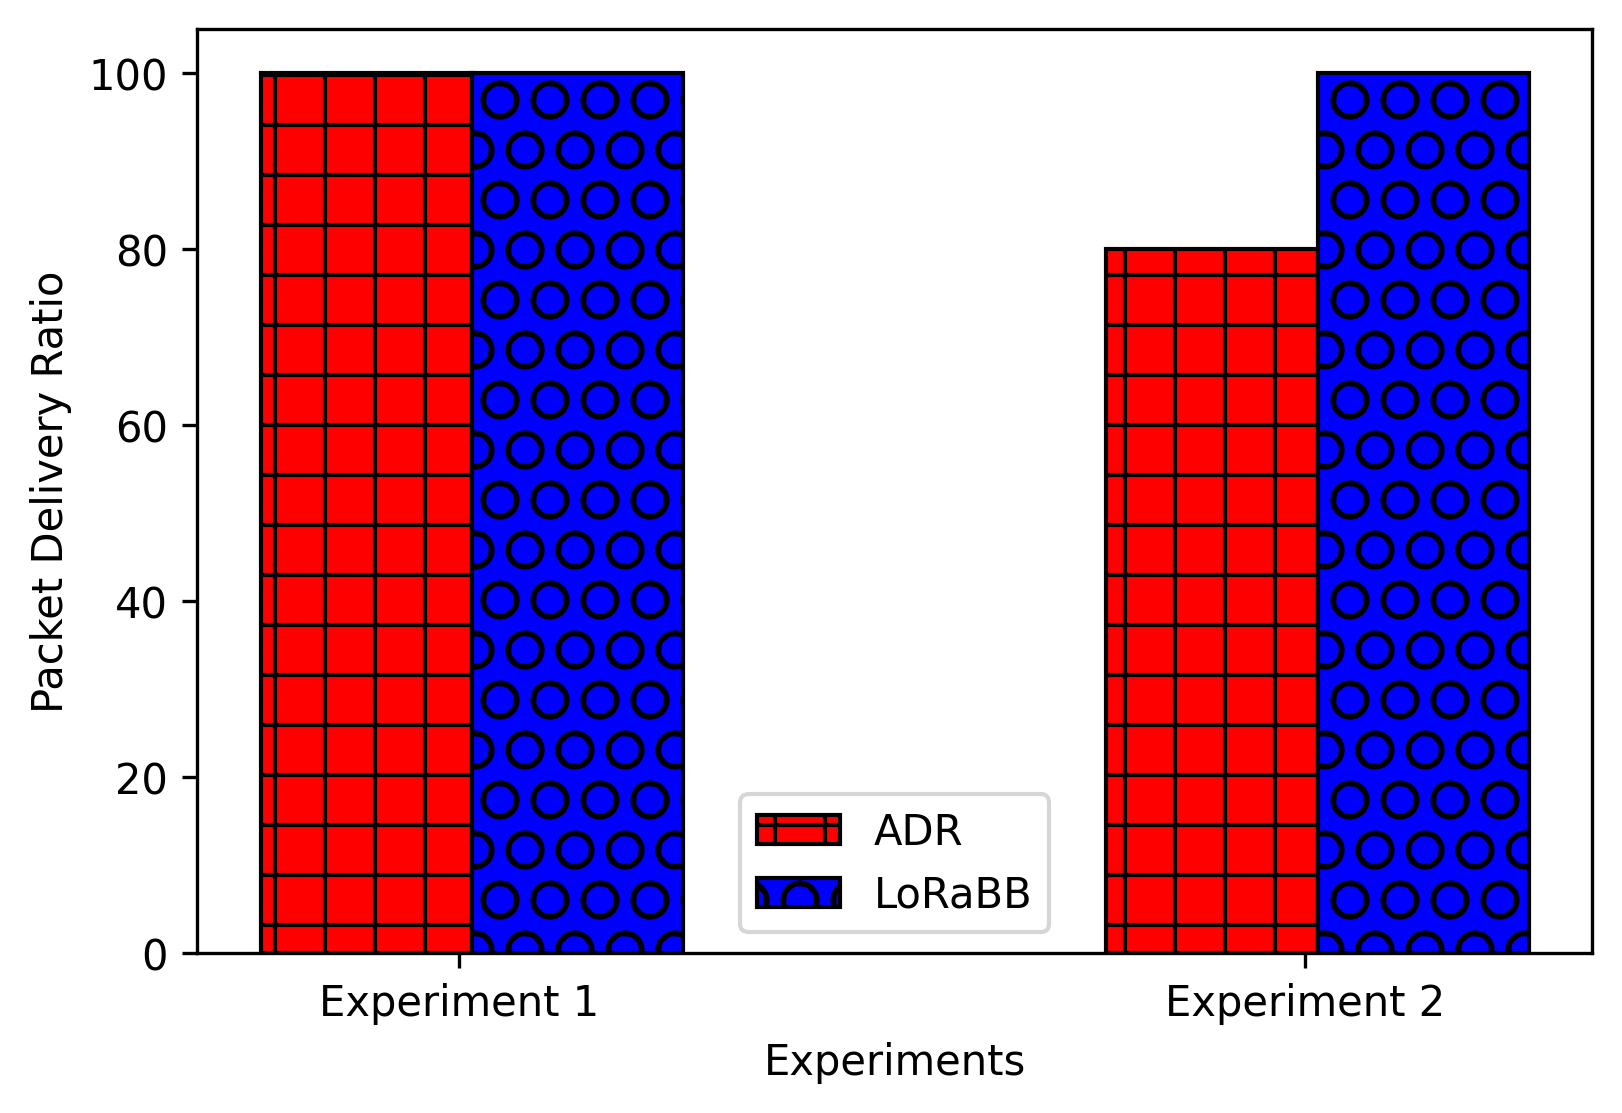

In [140]:
barwidth = 0.25

plt.figure(figsize=(6,4),dpi=300)

patterns = ["+" , "O"]

r1 = np.arange(len(ADR))
r2 = [x + barwidth for x in r1]

print(ADR)
print(BB)

ADR = [100, 80]
BB = [100, 100]

plt.bar(r1, ADR, color="Red" , width=barwidth, label="ADR", hatch=patterns[0], edgecolor = "black")
plt.bar(r2, BB, color="blue", width=barwidth, label="LoRaBB", hatch=patterns[1], edgecolor = "black")

plt.xlabel("Experiments")
plt.xticks([r + 0.11 for r in range(len(ADR))], ['Experiment 1', 'Experiment 2'])
plt.yticks([x for x in range(0, 101, 20)])
plt.ylabel('Packet Delivery Ratio')

plt.legend()
plt.show()


##Functions

In [141]:
vetor_dicio_info = []

def plot_correlation(data):
    '''
    plot the correlation's matrix to explore dependency between features
    '''
    fig = plt.figure(figsize=(8,6), dpi=300)
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap=cm.coolwarm_r)
    plt.show()
    #fig.savefig('corr.png')

def pre_processamento():
    with open('send_experimento_day2.log', 'r') as arquivo:
        dados = []
        dicio_info = {}
        linhas = arquivo.readlines()
        for linha in linhas:
            if(len(linha) > 1):
                dados.append(linha)
    with open("sendLog.txt", 'w') as arquivo_modificado:
        for dado in dados:
            arquivo_modificado.write(dado)

    with open('sendlog.txt', 'r') as arquivo:
        dados = []
        dicio_info = {}
        linhas = arquivo.readlines()
        for linha in linhas:
            if(len(linha) > 1):
                dados.append(linha)
    with open("sendLog2.txt", 'w') as arquivo_modificado:
        for dado in dados:
            arquivo_modificado.write(dado)

def readArquivo():
    cont = 0
    with open('sendLog.txt', 'r') as arquivo:
        linhas = arquivo.readlines()
        for linha in linhas:
            dados = linha.split(";")

            dicio_info = {}
            if(dados[1] != "SEMPACTRC\n"):
                dicio_info["Hora"] = dados[0]
                dicio_info["SF"] = dados[1]
                dicio_info["BW"] = dados[2]
                dicio_info["PT"] = dados[3]
                dicio_info["RSSI"] = dados[4]
                dicio_info["SNR"] = dados[5].replace("\n","")
                dicio_info["Distancia"] = 140
                vetor_dicio_info.append(dicio_info)
            else:
                cont+=1

    with open('sendLog2.txt', 'r') as arquivo:
        linhas = arquivo.readlines()
        for linha in linhas:
            dados = linha.split(";")

            dicio_info = {}
            if(dados[1] != "SEMPACTRC\n"):
                dicio_info["Hora"] = dados[0]
                dicio_info["SF"] = dados[1]
                dicio_info["BW"] = dados[2]
                dicio_info["PT"] = dados[3]
                dicio_info["RSSI"] = dados[4]
                dicio_info["SNR"] = dados[5].replace("\n","")
                dicio_info["Distancia"] = 70
                vetor_dicio_info.append(dicio_info)
            else:
                cont+=1

    print("Perdas ao total: ",cont)
    df = pd.DataFrame.from_dict(vetor_dicio_info)
    for linha in df:
        print(linha+"OIEE")
    df.to_csv('logWoWMoM.csv', index=False)
    return df
    '''
    df['PT'] = pd.to_numeric(df['PT'], errors='coerce')
    df['RSSI'] = pd.to_numeric(df['RSSI'], errors='coerce')
    df['SF'] = pd.to_numeric(df['SF'], errors='coerce')
    df['BW'] = pd.to_numeric(df['BW'], errors='coerce')
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    sns.boxplot(x='SF', y='RSSI', data=df[['SF', 'RSSI']],
                notch=False, linewidth=1.5, palette = "Set2", width=0.25,
                medianprops={"color": "black"}, ax=axs[0, 0])
    sns.boxplot(x='BW', y='RSSI', data=df[['BW', 'RSSI']],
                notch=False, linewidth=1.5, palette = "Set2", width=0.25,
                medianprops={"color": "black"}, ax=axs[0, 1])
    sns.boxplot(x='PT', y='RSSI', data=df[['PT', 'RSSI']],
                notch=False, linewidth=1.5, palette = "Set2", width=0.25,
                medianprops={"color": "black"}, ax=axs[1, 0])
    axs[1, 1].axis('off')
    plt.tight_layout()
    plt.show()

    '''

#Main

In [142]:

alcir = []
soma = 0
PDR = 0
SF =["7","8","9","10","11","12"]
BW = ["125.00","250.00","500.00"]
PT = ["10","12","14","16","18","20"]
Distancia = [70, 140]
pre_processamento()
valor = readArquivo()
valor.insert(6, "PRD", [0 for i in range(len(valor))], True)
#print(valor)
for i in SF:
    for j in BW:
        for k in PT:
            soma = 0
            media = 0
            NewDf = valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k)]#print(NewDf)
            print(len(NewDf))
            if(len(NewDf)==0 or len(NewDf)==1):

                new_row = {'Hora': None, 'RSSI': None, 'SNR': None,'SF': i, 'BW': j, 'PT': k, 'PRD': 0}
                valor = pd.concat([valor, pd.DataFrame([new_row])], ignore_index=True)
                NewDf = valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k)]
                #print("Tratou a parada!!!   ", len(NewDf))
                PDR = len(NewDf)
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'PRD'] = PDR
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'R'] = 0
                #alcir.append(valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'R'].iloc[0])
                #print(i, j, k, w)
            else:
                print(i, j, k)
                #print("Não tratou a parada!!!   ", len(NewDf))
                PDR = len(NewDf)
                print("PDR: ",PDR)
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'PRD'] = PDR


                RSSIva = sum(pd.to_numeric(valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'RSSI']))
                RSSImi = pd.to_numeric(valor['RSSI']).min()
                RSSImax = pd.to_numeric(valor['RSSI']).max()



                print("RSSImi: ", RSSImi)
                print("RSSImax: ", RSSImax)


                #print(sum(pd.to_numeric(valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'SNR']))/PDR)
                SNRva = sum(pd.to_numeric(valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'SNR'])+20)
                SNRmi = pd.to_numeric(valor['SNR']).min()+20
                SNRmax = pd.to_numeric(valor['SNR']).max()+20


                print("SNRmi: ", SNRmi)
                print("SNRmax: ", SNRmax)

                '''
                #print("Eh a soma ", soma)
                #print(alcir)
                mediaRSSI = somaRSSI/ PDR


                dados = pd.to_numeric(valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'SNR'])
                dados = dados+20

                somaSNR = sum(dados)

                mediaSNR = somaSNR/ PDR
                '''


                RSSIva = RSSIva/ PDR
                SNRva = SNRva/PDR



                    #print(PDR)
                print("RSSIva: ", RSSIva)
                print("SNRva: ", SNRva)
                PDR = (PDR*100)/120
                PDR = PDR/100

                print("PDR porc: ",PDR)

                RSSInorm = (RSSIva - RSSImi)/ (RSSImax - RSSImi)
                SNRnorm = (SNRva - SNRmi)/ (SNRmax - SNRmi)
                print("RSSInorm: ", RSSInorm)
                print("SNRnorm: ", SNRnorm)

                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'RSSInormalizado'] = RSSInorm
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'SNRnormalizado'] = SNRnorm

                valorR1 = 0.2*(RSSInorm)+0.2*SNRnorm+0.6*PDR
                valorR2 = 0.2*(RSSInorm)+0.6*SNRnorm+0.2*PDR
                valorR3 = 0.6*(RSSInorm)+0.2*SNRnorm+0.2*PDR

                print("valor do R1 ", valorR1)
                print("valor do R2 ", valorR2)
                print("valor do R3 ", valorR3)
                #print(i, j, k)
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'R1'] = valorR1
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'R2'] = valorR2
                valor.loc[(valor['SF'] == i) & (valor['BW'] == j) & (valor['PT'] == k), 'R3'] = valorR3
                alcir.append(valorR1)
'''
# Separar os recursos e o alvo
X = valor[['SF', 'BW', 'PT']]
y = valor['R']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar a Análise de Componentes Principais (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um novo DataFrame para os resultados da PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['R'] = y

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['R'], cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('Visualização PCA dos Atributos SF, BW, PT em relação a R')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Valor de R')
plt.show()
'''


valor['Concatenation'] = valor['SF'].astype(str) + valor['BW'].astype(str) + valor['PT'].astype(str)
'''
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Concatenation', y='R', data=valor, palette='viridis', alpha=0.8)
plt.title('Concatenation vs R')
plt.xlabel('Concatenation (SF, BW, PT)')
plt.ylabel('R')


plt.xticks(rotation=90)  # Rotacionar os rótulos
plt.show()

print(alcir)
'''
#print(valor.head())

# Assuming valor is your DataFrame
df_ordenado_R1 = valor.sort_values(by='R1')
df_ordenado_R2 = valor.sort_values(by='R2')
df_ordenado_R3 = valor.sort_values(by='R3')

# Creating Concatenation column for each sorted DataFrame
df_ordenado_R1['Concatenation'] = df_ordenado_R1['SF'].astype(str) + df_ordenado_R1['BW'].astype(str) + df_ordenado_R1['PT'].astype(str)
df_ordenado_R2['Concatenation'] = df_ordenado_R2['SF'].astype(str) + df_ordenado_R2['BW'].astype(str) + df_ordenado_R2['PT'].astype(str)
df_ordenado_R3['Concatenation'] = df_ordenado_R3['SF'].astype(str) + df_ordenado_R3['BW'].astype(str) + df_ordenado_R3['PT'].astype(str)



'''
# Scatter plot para SF vs R
plt.figure(figsize=(12, 5))
sns.scatterplot(data=valor, x='SF', y='R')
plt.title('SF vs R')
#plt.show()

# Scatter plot para BW vs R
plt.figure(figsize=(12, 5))
sns.scatterplot(data=valor, x='BW', y='R')
plt.title('BW vs R')
#plt.show()
axes = plt.gca()
axes.set_ylim([0, 2])
# Scatter plot para PT vs R
plt.figure(figsize=(12, 5))
sns.scatterplot(data=valor, x='PT', y='R')
plt.title('PT vs R')
plt.show()
'''
#print(valor)
#print(media)
print(alcir)
#print(len(alcir))
#print(media)
# print("---------------VAlOR FINAl  DO DATAFRAME-----------------")
# print(valor)

Perdas ao total:  27
HoraOIEE
SFOIEE
BWOIEE
PTOIEE
RSSIOIEE
SNROIEE
DistanciaOIEE
120
7 125.00 10
PDR:  120
RSSImi:  -137.5
RSSImax:  -104.0
SNRmi:  0.75
SNRmax:  33.5
RSSIva:  -111.31666666666666
SNRva:  26.975
PDR porc:  1.0
RSSInorm:  0.7815920398009951
SNRnorm:  0.800763358778626
valor do R1  0.9164710797159242
valor do R2  0.8367764232273747
valor do R3  0.8291078956363223
117
7 125.00 12
PDR:  117
RSSImi:  -137.5
RSSImax:  -104.0
SNRmi:  0.75
SNRmax:  33.5
RSSIva:  -114.22649572649573
SNRva:  25.525641025641026
PDR porc:  0.975
RSSInorm:  0.6947314708508738
SNRnorm:  0.7565081229203366
valor do R1  0.8752479187542421
valor do R2  0.7878511679223767
valor do R3  0.7631405070945916
98
7 125.00 14
PDR:  98
RSSImi:  -137.5
RSSImax:  -104.0
SNRmi:  0.75
SNRmax:  33.5
RSSIva:  -126.39030612244898
SNRva:  15.943877551020408
PDR porc:  0.8166666666666668
RSSInorm:  0.3316326530612246
SNRnorm:  0.46393519239756975
valor do R1  0.6491135690917589
valor do R2  0.5080209793841202
valor do R3

<ipython-input-169-f83e04271dbb>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Concatenation', y='R1', data=df_ordenado_R1, palette='viridis', alpha=0.8)


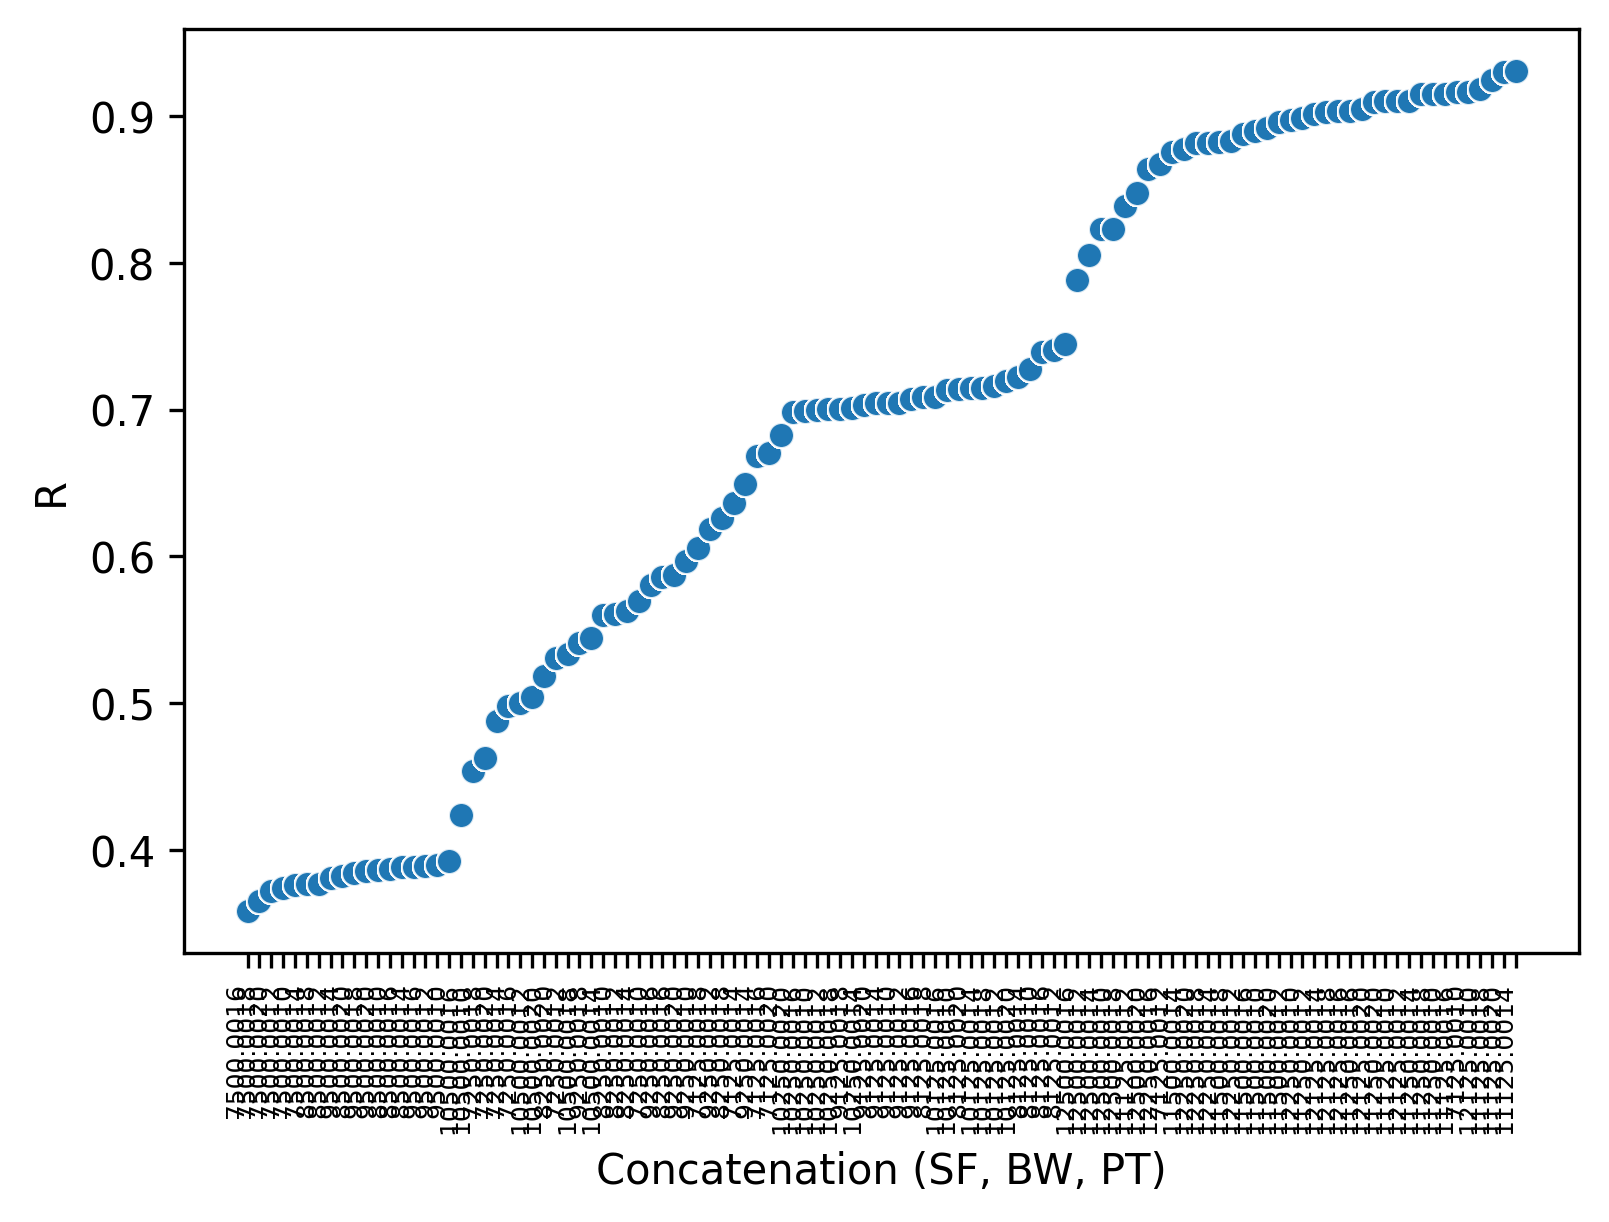

In [169]:
# Plotting for R1
plt.figure(figsize=(6,4),dpi=300)
sns.scatterplot(x='Concatenation', y='R1', data=df_ordenado_R1, palette='viridis', alpha=0.8)
plt.xlabel('Concatenation (SF, BW, PT)')
plt.ylabel('R')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.show()


<ipython-input-144-8c800d2dbe9c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Concatenation', y='R1', data=df_ordenado_R1, palette='viridis', alpha=0.8)


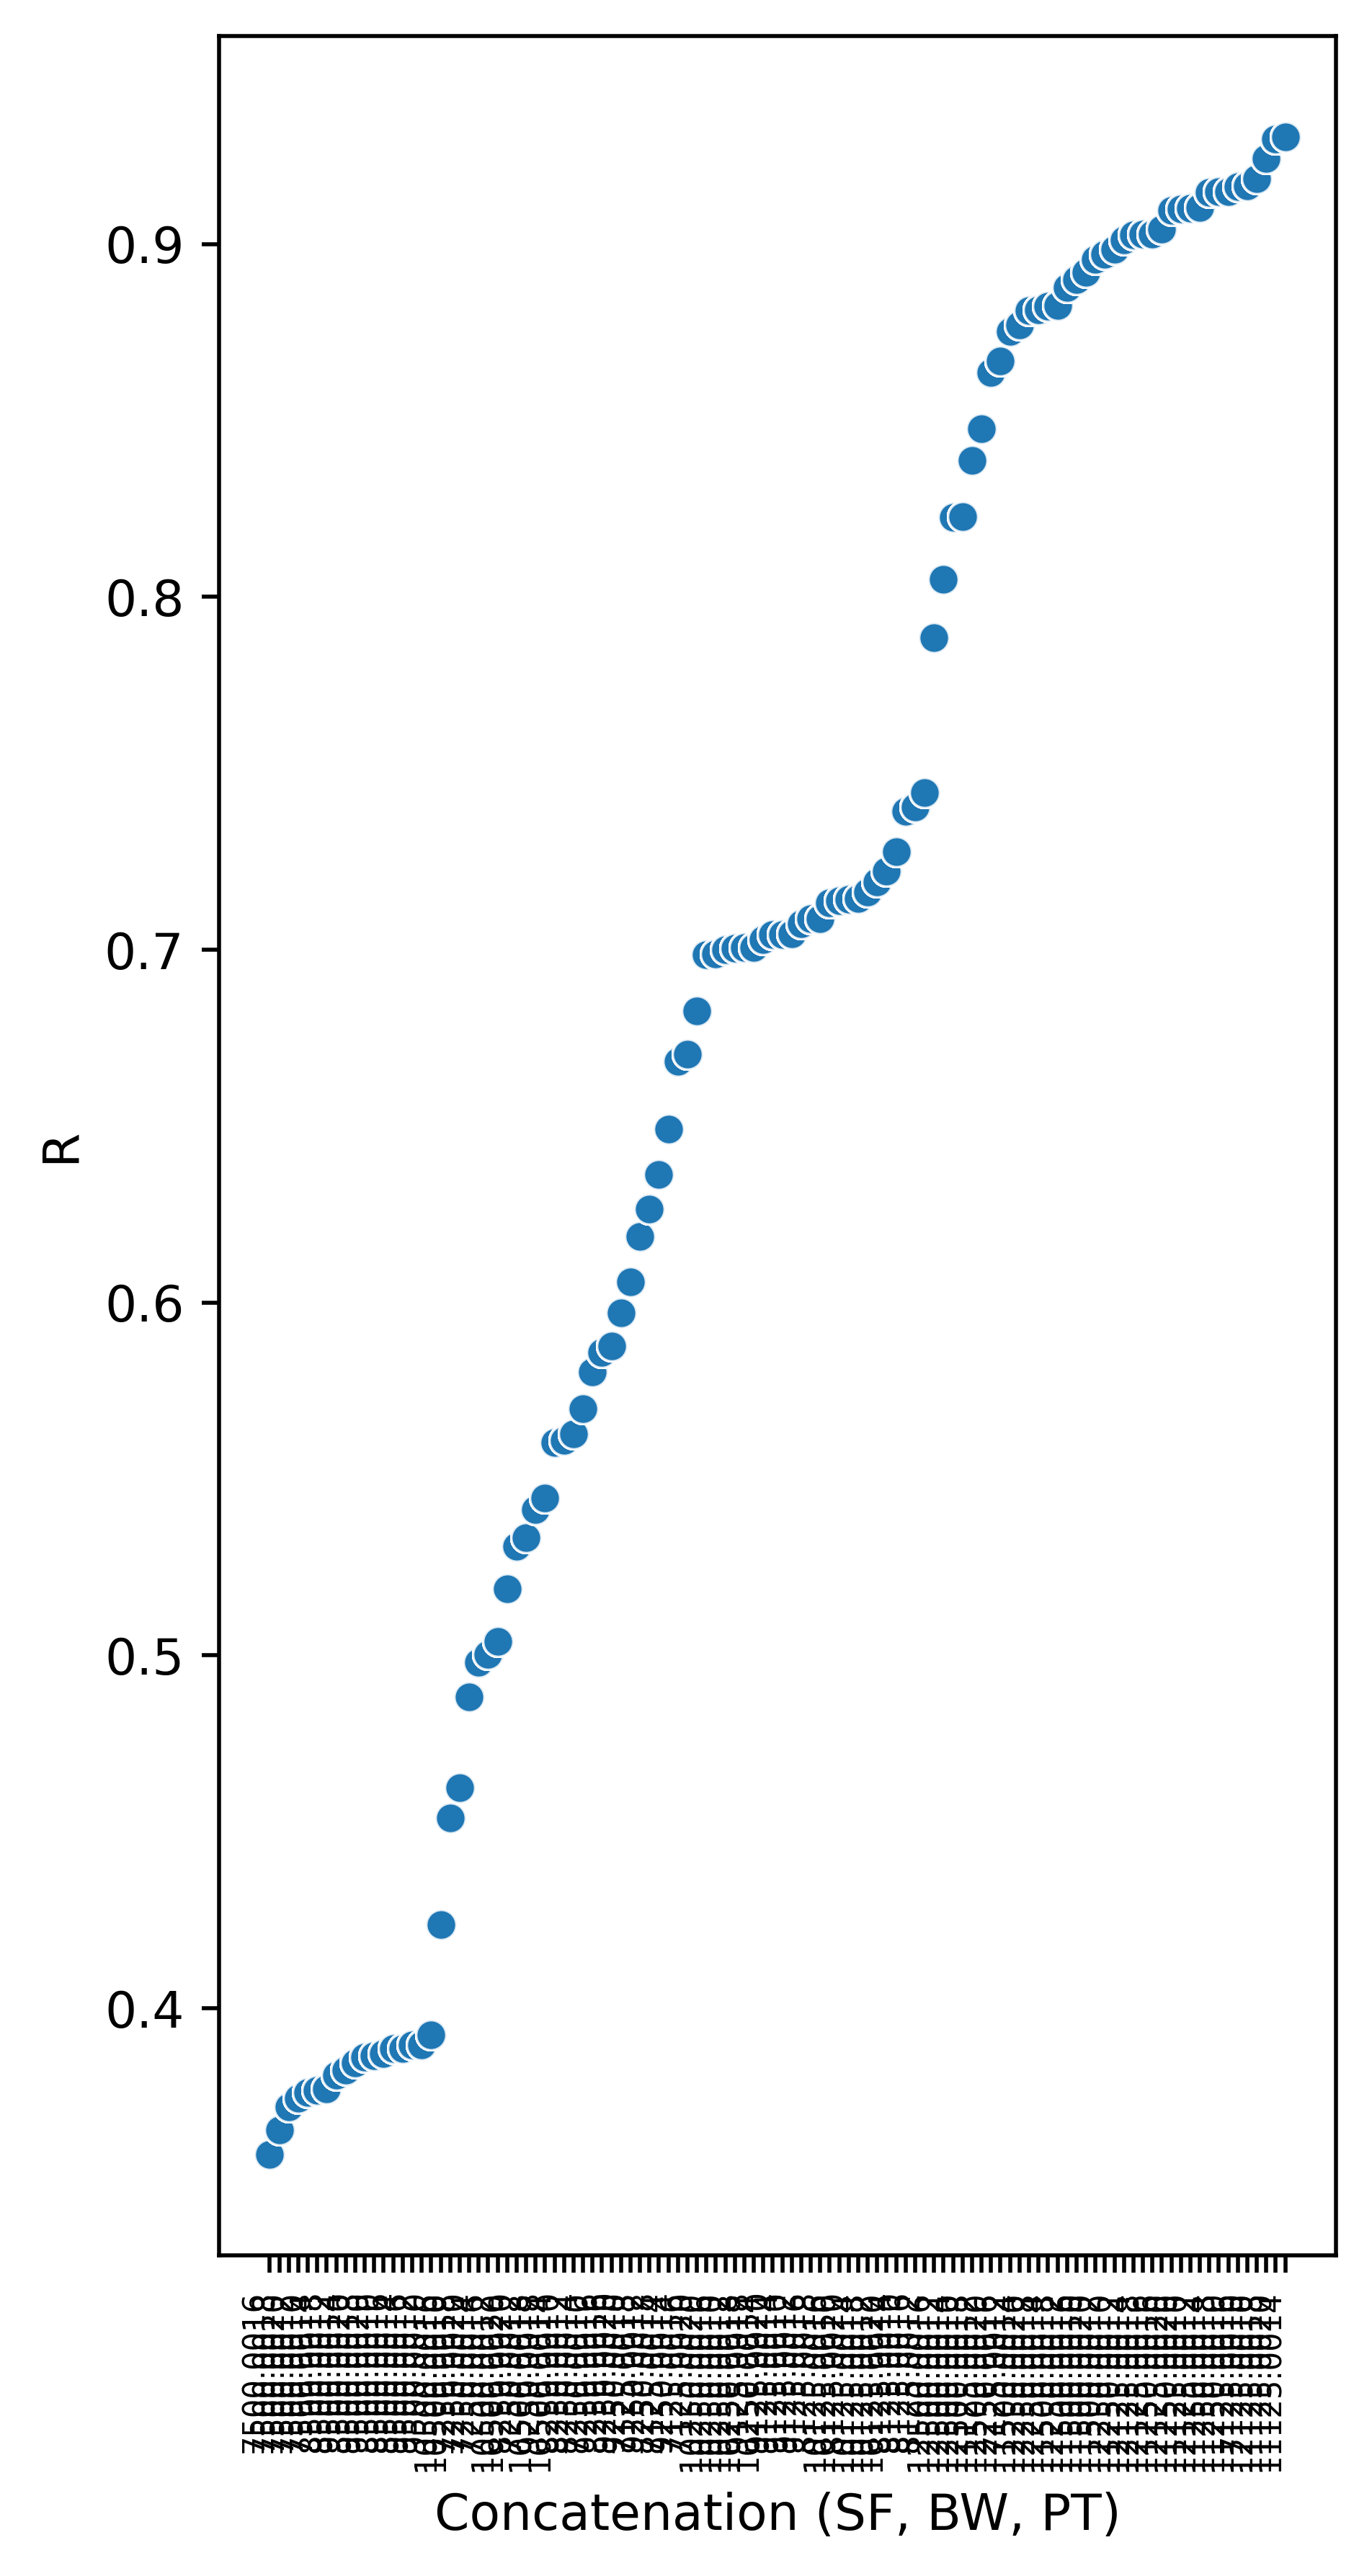

In [144]:
# Plotting for R1
plt.figure(figsize=(4,8),dpi=500)
sns.scatterplot(x='Concatenation', y='R1', data=df_ordenado_R1, palette='viridis', alpha=0.8)
plt.xlabel('Concatenation (SF, BW, PT)')
plt.ylabel('R')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.show()

<ipython-input-145-ef3311208231>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Concatenation', y='R2', data=df_ordenado_R2, palette='viridis', alpha=0.8)


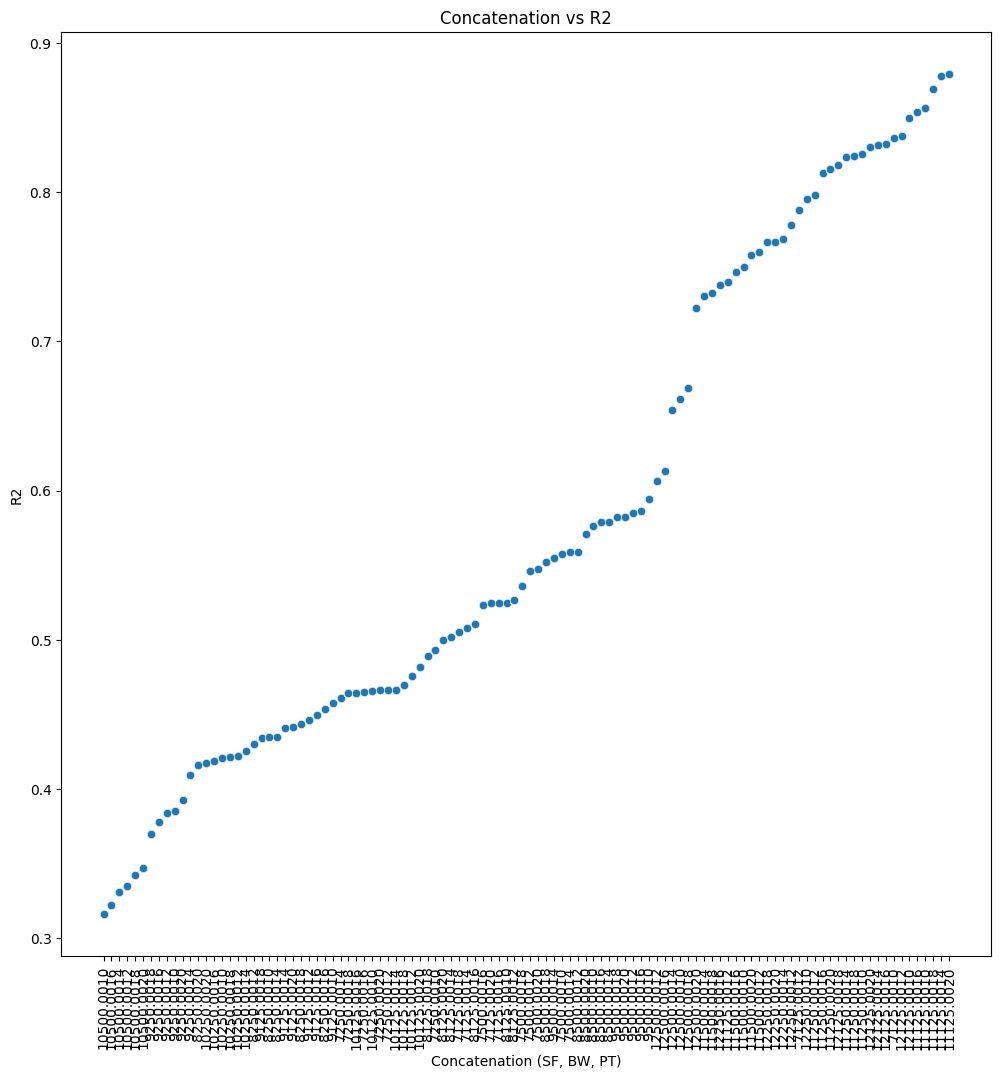

In [145]:
# Plotting for R2
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Concatenation', y='R2', data=df_ordenado_R2, palette='viridis', alpha=0.8)
plt.title('Concatenation vs R2')
plt.xlabel('Concatenation (SF, BW, PT)')
plt.ylabel('R2')
plt.xticks(rotation=90)
plt.show()

<ipython-input-146-e32e98de7598>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Concatenation', y='R3', data=df_ordenado_R3, palette='viridis', alpha=0.8)


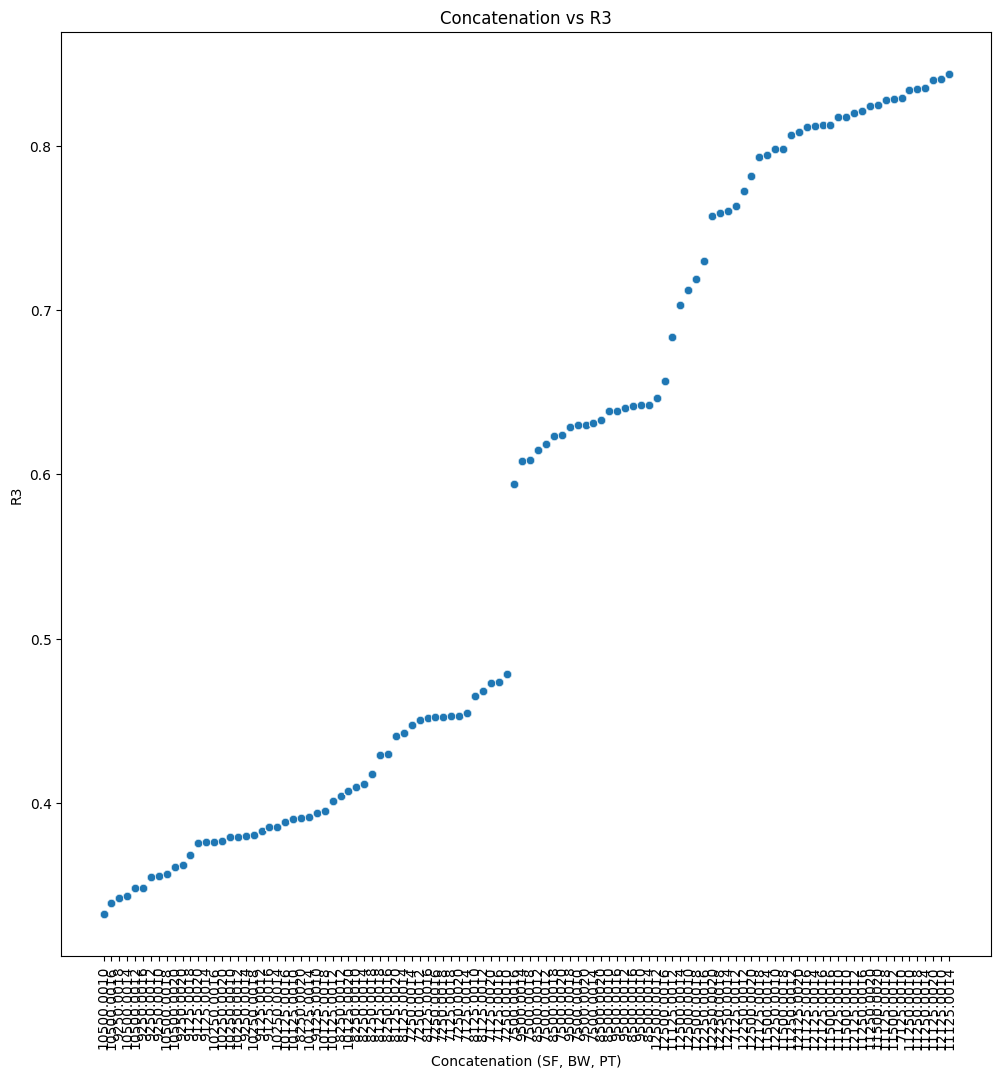

In [146]:

# Plotting for R3
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Concatenation', y='R3', data=df_ordenado_R3, palette='viridis', alpha=0.8)
plt.title('Concatenation vs R3')
plt.xlabel('Concatenation (SF, BW, PT)')
plt.ylabel('R3')
plt.xticks(rotation=90)
plt.show()